<a href="https://colab.research.google.com/github/IonaSantana/Artificial-Intelligence/blob/main/Redes_Bayesianas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## REDES BAYESIANAS 

In [ ]:
pip install matplotlib

In [ ]:
pip install pomegranate

In [ ]:
import pomegranate as po
from matplotlib import *
#from graphviz import * #se não der certo apaga esse

In [ ]:
from graphviz import Source
from IPython.core.magic import register_cell_magic

@register_cell_magic
def graph(line, cell):
  src = "digraph {%s}" % cell
  g = Source(src)
  if line:
    name = line.split()[0]
    globals()[name] = g
  else:
    return g

## **VIDA NA FACULDADE**

In [ ]:
'''
C= que você ingressará em uma faculdade
S= que você estudará
P= que você frequentará festas
E= que você será bem sucedido nos seus exames
F= que você se divertirá
'''

C = po.DiscreteDistribution({"V":0.2, "F": 0.8})

S = po.ConditionalProbabilityTable([
    ["V", "V", 0.8],
    ["V", "F", 0.2],
    ["F", "V", 0.2],     
    ["F", "F", 0.8]                                
], [C])

P = po.ConditionalProbabilityTable ([
    ["V", "V", 0.6],
    ["V", "F", 0.4],
    ["F", "V", 0.5],     
    ["F", "F", 0.5]                                  
                                  
], [C])

F = po.ConditionalProbabilityTable ([
    ["V", "V", 0.9],
    ["V", "F", 0.1],
    ["F", "V", 0.7],     
    ["F", "F", 0.3]                                  
                                  
], [P])

E = po.ConditionalProbabilityTable ([
    ["V", "V", "V", 0.6],
    ["V", "V", "F", 0.4],
    ["V", "F", "V", 0.9],     
    ["V", "F", "F", 0.1],    
    ["F", "V", "V", 0.1],
    ["F", "V", "F", 0.9],
    ["F", "F", "V", 0.2],     
    ["F", "F", "F", 0.8]                                
                                  
], [S,P])

noC = po.State (C, name = "C")
noS = po.State (S, name = "S")
noP = po.State (P, name = "P")
noE = po.State (E, name = "E")
noF = po.State (F, name = "F")

network = po.BayesianNetwork ("Vida na Faculdade")
network.add_states(noC, noS, noP, noE, noF)

network.add_edge(noC,noP)
network.add_edge(noC,noS)
network.add_edge(noS,noE)
network.add_edge(noP,noE)
network.add_edge(noP,noF)

network.bake()
# P(C^S^-P^E^-F)
print (network.probability([
      ['V','V','F','V','F']                        
]))

# P(C^S^P^E^F)
print (network.probability([
      ['V','V','V','V','V']                        
]))

# P(C^S^-P^E^F)
print (network.probability([
      ['V','V','F','V','V']                        
]))


#network.plot()

0.017280000000000007
0.05184000000000001
0.04032000000000001


In [ ]:
%%graph g
C -> P
C -> S
S -> E
P -> E
P -> F


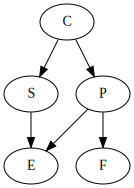

In [ ]:
g

## **Suposições - Roubou ou não roubou?**

---



In [ ]:
'''
R = Roubo
T = Terremoto
A = Alarme
J = JoaoLiga
M = MariaLiga
'''

R = po.DiscreteDistribution({"V":0.001, "F": 0.999})

T = po.DiscreteDistribution({"V":0.002, "F": 0.998})

A = po.ConditionalProbabilityTable ([
    ["V", "V", "V", 0.95],
    ["V", "V", "F", 0.05],
    ["V", "F", "V", 0.94],     
    ["V", "F", "F", 0.06],    
    ["F", "V", "V", 0.29],
    ["F", "V", "F", 0.71],
    ["F", "F", "V", 0.001],     
    ["F", "F", "F", 0.999]                                
                                  
], [R,T])

J = po.ConditionalProbabilityTable ([
    ["V", "V", 0.9],
    ["V", "F", 0.1],
    ["F", "V", 0.05],     
    ["F", "F", 0.95]                                  
                                  
], [A])

M = po.ConditionalProbabilityTable ([
    ["V", "V", 0.70],
    ["V", "F", 0.30],
    ["F", "V", 0.01],     
    ["F", "F", 0.99]                                  
                                  
], [A])

noR = po.State (R, name = "R")
noT = po.State (T, name = "T")
noA = po.State (A, name = "A")
noJ = po.State (J, name = "J")
noM = po.State (M, name = "M")

network = po.BayesianNetwork ("Suposições")
network.add_states(noR, noT, noA, noJ, noM)

network.add_edge(noR,noA)
network.add_edge(noT,noA)
network.add_edge(noA,noJ)
network.add_edge(noA,noM)

network.bake()

# P(R^T^-A^J^-M)
print (network.probability([
      ['V','V','F','V','F']                        
]))

# P(R^T^A^J^M)
print (network.probability([
      ['V','V','V','V','V']                        
]))

# P(R^T^-A^J^M)
print (network.probability([
      ['V','V','F','V','V']                        
]))



4.949999999999992e-09
1.1969999999999995e-06
5.0000000000000066e-11


In [ ]:
%%graph g1
R -> A
T -> A
A -> J
A -> M


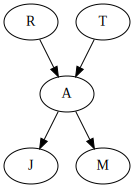

In [ ]:
g1